## K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


### Get the data

Set index_col = 0 to use the first column as the index

In [23]:
df = pd.read_csv("Dataset/Classified Data", index_col = 0)

In [24]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observation that are nearest to it. The sacle of the varables matters. Any variables that are on a large scale will have much larger effect on the distance between the observation, and hence on the KNN classifier than variables that are on a small scale.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(df.drop('TARGET CLASS',axis =1))

,copy,True
,with_mean,True
,with_std,True


In [28]:
scaled_features = scaler.transform(df.drop("TARGET CLASS",axis = 1))

In [29]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df["TARGET CLASS"],test_size=30)

### Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not .We will start with K= 1.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train,Y_train)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
pred = knn.predict(X_test)

### Prediction and Evalution

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [49]:
print(confusion_matrix(Y_test,pred))

[[14  1]
 [ 2 13]]


In [50]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### Choose a K value

Lets go head and use the elbow method to pick a good K value

In [64]:
accuarcy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, df["TARGET CLASS"], cv = 10)
    accuarcy_rate.append(score.mean())

In [51]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

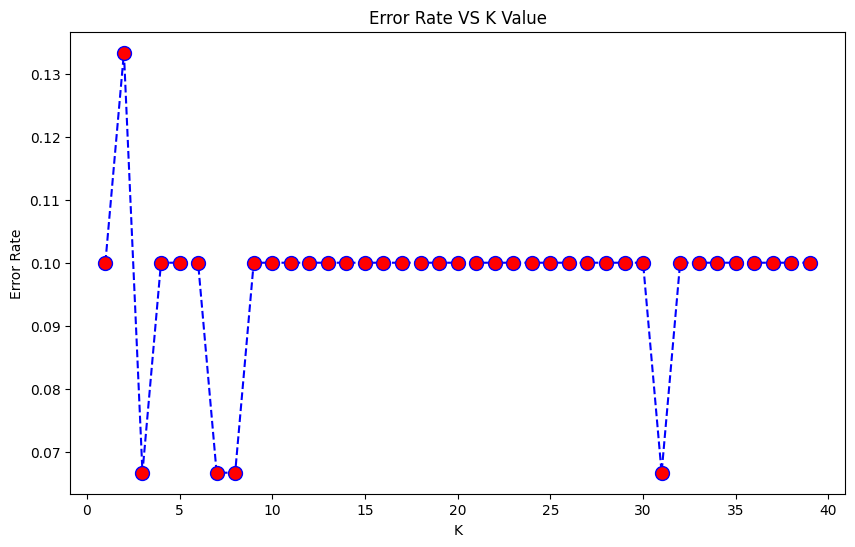

In [52]:
plt.figure(figsize= (10,6))
plt.plot(range(1,40),error_rate,color ="blue", linestyle = 'dashed', marker = 'o',markerfacecolor="red", markersize = 10)

plt.title("Error Rate VS K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [53]:
# First a quick comparison to our original K  = 1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print("K = 1\n")
print(confusion_matrix(Y_test,pred))
print("\n")
print(classification_report(Y_test,pred))


K = 1

[[14  1]
 [ 2 13]]


              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [67]:
# Now with K = 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print("K = 1\n")
print(confusion_matrix(Y_test,pred))
print("\n")
print(classification_report(Y_test,pred))


K = 1

[[14  1]
 [ 1 14]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



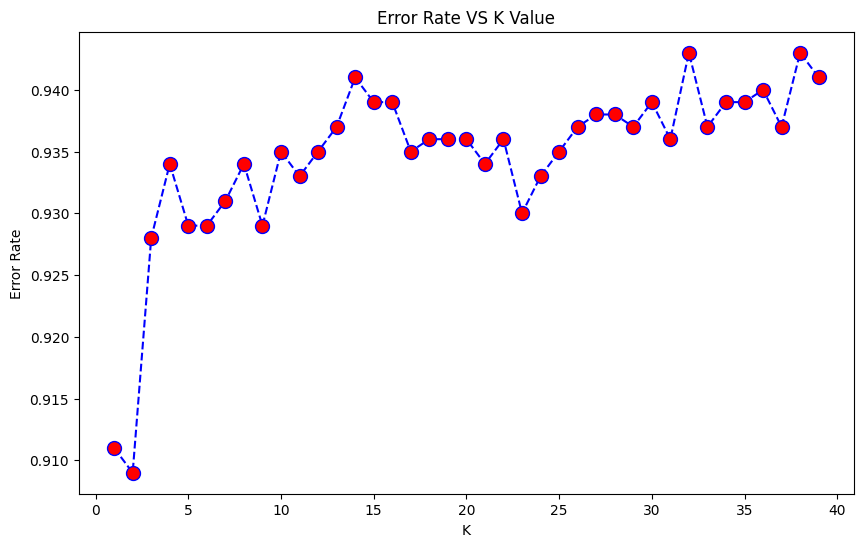

In [65]:
plt.figure(figsize= (10,6))
plt.plot(range(1,40),accuarcy_rate,color ="blue", linestyle = 'dashed', marker = 'o',markerfacecolor="red", markersize = 10)

plt.title("Error Rate VS K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()